<a href="https://colab.research.google.com/github/nivedha75/Columbia-Summer-Coursework/blob/master/BostonHousingClusteringChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/bostonhousing.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']])
column1 = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
columns = []
for item in column1:
  columns.append(item + '_scaled')
df_scaled = pd.DataFrame(data=scaled, columns=columns)
df = df.join(df_scaled)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,crim_scaled,zn_scaled,indus_scaled,chas_scaled,nox_scaled,rm_scaled,age_scaled,dis_scaled,rad_scaled,tax_scaled,ptratio_scaled,b_scaled,lstat_scaled
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [ ]:
df['medv_binary'] = 0
df.loc[df['medv'] > 22, 'medv_binary'] = 1
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,crim_scaled,zn_scaled,indus_scaled,chas_scaled,nox_scaled,rm_scaled,age_scaled,dis_scaled,rad_scaled,tax_scaled,ptratio_scaled,b_scaled,lstat_scaled,medv_binary
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,1
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,0


# Regular Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 
KNN = KNeighborsClassifier(n_neighbors=3)
'''
columns = ['chas_scaled',
   'nox_scaled',
   'rm_scaled',
   'b_scaled',
   'lstat_scaled']
'''

X = df[columns]
y = df['medv_binary']

KNN.fit(X, y)
 
df['prediction'] = KNN.predict(X)
df[['medv_binary','prediction']].sample(20)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
print(accuracy_score(df['medv_binary'],df['prediction']))
print(recall_score(df['medv_binary'],df['prediction'],average='macro'))
print(precision_score(df['medv_binary'],df['prediction'],average='macro'))
print(f1_score(df['medv_binary'],df['prediction'],average='macro'))

0.9288537549407114
0.9253108742545362
0.930223976383006
0.927383477110009


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import numpy as np
#default here is Stratified
scores = cross_val_score(KNN, X, y, cv=5, scoring = 'f1_macro')
print(np.mean(scores))

0.7737002882048449


# Model with kmeans_cluster binary variables

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


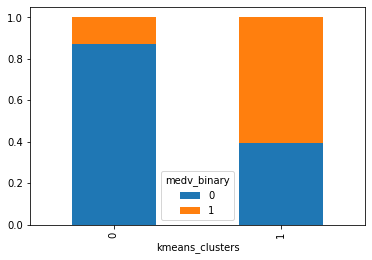

In [ ]:
from sklearn.cluster import KMeans

X = df[columns]

kmeans = KMeans(n_clusters = 2)
df['kmeans_clusters'] = kmeans.fit_predict(X)

pd.crosstab(df.kmeans_clusters, df.medv_binary).apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked=True)

In [ ]:
df
df['kmeans_clusters'].value_counts()

1    329
0    177
Name: kmeans_clusters, dtype: int64

In [ ]:
df = df.join(pd.get_dummies(df['kmeans_clusters'], prefix = 'kmeans_clusters'))
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,crim_scaled,zn_scaled,indus_scaled,chas_scaled,nox_scaled,rm_scaled,age_scaled,dis_scaled,rad_scaled,tax_scaled,ptratio_scaled,b_scaled,lstat_scaled,medv_binary,prediction,kmeans_clusters,kmeans_clusters_0,kmeans_clusters_1
451,5.44114,0.0,18.10,0,0.713,6.655,98.2,2.3552,24,666,20.2,355.29,17.73,15.2,0.212686,-0.487722,1.015999,-0.272599,1.367490,0.527645,1.053485,-0.684457,1.661245,1.530926,0.806576,-0.015175,0.711653,0,0,0,1,0
201,0.03445,82.5,2.03,0,0.415,6.162,38.4,6.2700,2,348,14.7,393.77,7.43,24.1,-0.416508,3.053142,-1.328764,-0.272599,-1.206732,-0.174712,-1.073037,1.176518,-0.867883,-0.357765,-1.736418,0.406733,-0.732137,1,1,1,0,1
130,0.34006,0.0,21.89,0,0.624,6.458,98.9,2.1185,4,437,21.2,395.04,12.60,19.2,-0.380944,-0.487722,1.568995,-0.272599,0.598679,0.246987,1.078378,-0.796977,-0.637962,0.170831,1.268938,0.420658,-0.007438,0,0,0,1,0
218,0.11069,0.0,13.89,1,0.550,5.951,93.8,2.8893,5,276,16.4,396.90,17.92,21.5,-0.407636,-0.487722,0.401721,3.668398,-0.040557,-0.475315,0.897019,-0.430562,-0.523001,-0.785394,-0.950402,0.441052,0.738286,0,0,1,0,1
75,0.09512,0.0,12.83,0,0.437,6.286,45.0,4.5026,5,398,18.7,383.23,8.94,21.4,-0.409448,-0.487722,0.247057,-0.272599,-1.016689,0.001946,-0.838337,0.336351,-0.523001,-0.060801,0.113032,0.291169,-0.520474,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,13.35980,0.0,18.10,0,0.693,5.887,94.7,1.7821,24,666,20.2,396.90,16.35,12.7,1.134206,-0.487722,1.015999,-0.272599,1.194724,-0.566493,0.929023,-0.956891,1.661245,1.530926,0.806576,0.441052,0.518214,0,0,0,1,0
50,0.08873,21.0,5.64,0,0.439,5.963,45.7,6.8147,4,243,16.8,395.56,13.45,19.7,-0.410192,0.413589,-0.802031,-0.272599,-0.999412,-0.458219,-0.813445,1.435452,-0.637962,-0.981390,-0.765457,0.426360,0.111710,0,0,1,0,1
409,14.43830,0.0,18.10,0,0.597,6.852,100.0,1.4655,24,666,20.2,179.36,19.78,27.5,1.259714,-0.487722,1.015999,-0.272599,0.365444,0.808302,1.117494,-1.107393,1.661245,1.530926,0.806576,-1.944135,0.999010,1,0,0,1,0
465,3.16360,0.0,18.10,0,0.655,5.759,48.2,3.0665,24,666,20.2,334.40,14.13,19.9,-0.052359,-0.487722,1.015999,-0.272599,0.866467,-0.748850,-0.724543,-0.346327,1.661245,1.530926,0.806576,-0.244220,0.207028,0,0,0,1,0


In [ ]:
inputs = columns
'''
inputs = ['crim_scaled',
   'zn_scaled',
   'indus_scaled',
   'chas_scaled',
   'nox_scaled',
   'rm_scaled',
   'dis_scaled',
   'lstat_scaled']
'''

inputs.append('kmeans_clusters_0')
inputs.append('kmeans_clusters_1')

'''
inputs.append('kmeans_clusters_2')
inputs.append('kmeans_clusters_3')
inputs.append('kmeans_clusters_4')
inputs.append('kmeans_clusters_5')
inputs.append('kmeans_clusters_6')
#inputs.append('kmeans_clusters_2')
'''
print(inputs)

X = df[inputs]
y = df['medv_binary']

KNN.fit(X, y)
 
df['prediction'] = KNN.predict(X)
df[['medv_binary','prediction']].sample(20)

['crim_scaled', 'zn_scaled', 'indus_scaled', 'chas_scaled', 'nox_scaled', 'rm_scaled', 'age_scaled', 'dis_scaled', 'rad_scaled', 'tax_scaled', 'ptratio_scaled', 'b_scaled', 'lstat_scaled', 'kmeans_clusters_0', 'kmeans_clusters_1']


,medv_binary,prediction
107,0,0
463,0,0
87,1,1
210,0,0
364,0,1
258,1,1
220,1,1
262,1,1
280,1,1
152,0,0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
print(accuracy_score(df['medv_binary'],df['prediction']))
print(recall_score(df['medv_binary'],df['prediction'],average='macro'))
print(precision_score(df['medv_binary'],df['prediction'],average='macro'))
print(f1_score(df['medv_binary'],df['prediction'],average='macro'))

0.9288537549407114
0.9253108742545362
0.930223976383006
0.927383477110009


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import numpy as np
#default here is Stratified
scores = cross_val_score(KNN, X, y, cv=5, scoring = 'f1_macro')
print(np.mean(scores))

0.8485358202192259


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
sfs = SFS(KNN, 
          k_features=13, 
          scoring='f1_macro',
          cv=5)
sfs = sfs.fit(X, y)
sfs.get_metric_dict()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


{1: {'avg_score': 0.8272657495016018,
  'ci_bound': 0.019227367145515883,
  'cv_scores': array([0.84093567, 0.80918763, 0.82481379, 0.81372951, 0.84766214]),
  'feature_idx': (12,),
  'feature_names': ('lstat_scaled',),
  'std_dev': 0.014959544856067966,
  'std_err': 0.007479772428033982},
 2: {'avg_score': 0.8445142425104397,
  'ci_bound': 0.02821975203795247,
  'cv_scores': array([0.86081871, 0.83891547, 0.87772397, 0.81776263, 0.82735043]),
  'feature_idx': (7, 12),
  'feature_names': ('dis_scaled', 'lstat_scaled'),
  'std_dev': 0.02195592580325374,
  'std_err': 0.010977962901626868},
 3: {'avg_score': 0.8654271105476614,
  'ci_bound': 0.036862642634270984,
  'cv_scores': array([0.85258695, 0.83968254, 0.88828557, 0.83696529, 0.90961519]),
  'feature_idx': (2, 7, 12),
  'feature_names': ('indus_scaled', 'dis_scaled', 'lstat_scaled'),
  'std_dev': 0.028680388314589723,
  'std_err': 0.014340194157294862},
 4: {'avg_score': 0.8814878109940242,
  'ci_bound': 0.048247893586215465,
  'cv_

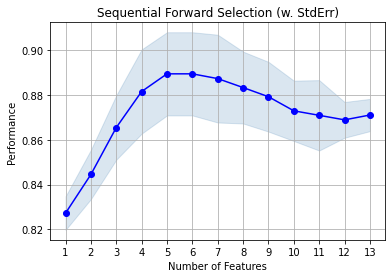

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,crim_scaled,zn_scaled,indus_scaled,chas_scaled,nox_scaled,rm_scaled,age_scaled,dis_scaled,rad_scaled,tax_scaled,ptratio_scaled,b_scaled,lstat_scaled,medv_binary,prediction,kmeans_clusters,kmeans_clusters_0,kmeans_clusters_1
448,9.32909,0.0,18.10,0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13,14.1,0.665139,-0.487722,1.015999,-0.272599,1.367490,-0.141945,1.071266,-0.728951,1.661245,1.530926,0.806576,0.441052,0.767723,0,0,0,1,0
217,0.07013,0.0,13.89,0,0.550,6.642,85.1,3.4211,5,276,16.4,392.78,9.69,28.7,-0.412356,-0.487722,0.401721,-0.272599,-0.040557,0.509124,0.587642,-0.177761,-0.523001,-0.785394,-0.950402,0.395879,-0.415344,1,1,1,0,1
447,9.92485,0.0,18.10,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6,0.734469,-0.487722,1.015999,-0.272599,1.600725,-0.047918,0.996589,-0.759185,1.661245,1.530926,0.806576,0.349171,0.530829,0,0,0,1,0
313,0.26938,0.0,9.90,0,0.544,6.266,82.8,3.2628,4,304,18.4,393.39,7.90,21.6,-0.389169,-0.487722,-0.180458,-0.272599,-0.092387,-0.026548,0.505853,-0.253012,-0.637962,-0.619094,-0.025677,0.402567,-0.666255,0,0,1,0,1
393,8.64476,0.0,18.10,0,0.693,6.193,92.6,1.7912,24,666,20.2,396.90,15.17,13.8,0.585501,-0.487722,1.015999,-0.272599,1.194724,-0.130548,0.854346,-0.952565,1.661245,1.530926,0.806576,0.441052,0.352809,0,0,0,1,0


In [ ]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
df.head()